In [1]:
# Use this cell to regroup all your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')

# 🏆 Le Wagon Kaggle Batch Challenge

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/ML/kaggle-batch-challenge.png' width=600>

🏆 Welcome to your first Kaggle competition!

Your objective is to **submit an answer online** to the open competition - [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

- Fortunately, you have already come across the house dataset in the bootcamp!
- You will be semi-guided up to a **baseline model**
- Only after will you be free to improve & refine your models
- We will approach the problem through **pipelines** (the best practice to take!)

A word on Kaggle:
- Kaggle will rank your submission amongst all participants!
- But don't worry, everyone is publicly removed from the leaderboard after 2 months
- You can make up to 10 submissions per day

🧹 Today is the perfect day to practice keeping your long notebook **tidy** 🧹
- "Collapse all headings" from the "command palette" (`Cmd + Shift + P`)
- Stay idempotent (`Restart & Run All` should never crash)
- Name and delete variables carefully

# Setup Kaggle

👉 Create an account on Kaggle if you want to participate in the competition. 

👉 Join the [House Prices Challenge](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) 

👉 Write down your Kaggle `username` in the [result spreadsheet here](https://docs.google.com/spreadsheets/d/1ZEBKwa_k1Ytb0WCOh-Nopq3eaezwBNu1SAqKXEXRguc/edit#gid=0) (pick the correct batch!)

**Your whole class will compete as a group against the team of TAs**

# Load

In the challenge instructions, you should have already executed the steps to download everything you need from Kaggle into your current notebook folder:

- `train.csv` is your (1460 * 81) training set containing `X` and `y`
- `test.csv` is your (1459 * 80) testing set without the associated target `y` 😈
- `sample_submission.csv` describing the format required to submit your answer

ℹ️ You'll find a detailed description of the dataset [here](https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/07-Ensemble-Methods/kaggle_houses_data_description.txt). Refer to it throughout the challenge!

Your goal is to predict the `y_pred` missing from your test set and submit it to discover your test_score & ranking

❓ Load the training dataset in a DataFrame `data` and create your `X` and `y`. Inspect their shapes.

**Hint:** if you check the CSV file, you will notice a column called `Id`. When reading the CSV file into a DF, make sure to set `index_col="Id"` so that you don't get two ID columns 😉

In [2]:
#loading Data
data = pd.read_csv("data/train.csv",index_col="Id")

#Features and Target
X = data.drop(columns="SalePrice")
y = data["SalePrice"]

In [3]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


## 🐣 1. BASELINE

### 1.1 Initial feature overview

80 features is too much to deal with one-by-one for a first baseline pipeline! Let's treat them solely based on their `dtype`:

❓ How many numerical features vs. categorical features do we have? 

In [4]:
#dtypes of features
X.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

In [5]:
# selecting just Cat features
cat_features = X.select_dtypes(include="object")

❓ Store the Series `feat_categorical_nunique` containing the number of **unique values** for each categorical feature in our training set. How many unique categories are there in total ?

In [6]:
# unique values for each cat
feat_categorical_nunique = cat_features.nunique()
feat_categorical_nunique

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

🤔 If we were to `OneHotEncode` all categorical features, our feature matrix `X_preproc` would become pretty big and sparse, with almost 300 (highly correlated) features for only 1400 observations. Ideally, we should aim at feeding our model with ~50 features max (📚 Read this [rule of thumb](https://datascience.stackexchange.com/a/11480/98300))

We know 2 main strategies to reduce the number of categorical features post-preprocessing:
- **[Remove](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)** features that bring too little explanation to our model. This may require statistical analysis of feature importance 
- **[Ordinally encode](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html)** (instead of one-hot-encode) categorical features into integers. However this forces a notion of "order" (1>2>3...) that can be detrimental if not set properly!

❓ Plot the **histogram** of number of unique value per categorical feature. Do you see some quick wins?

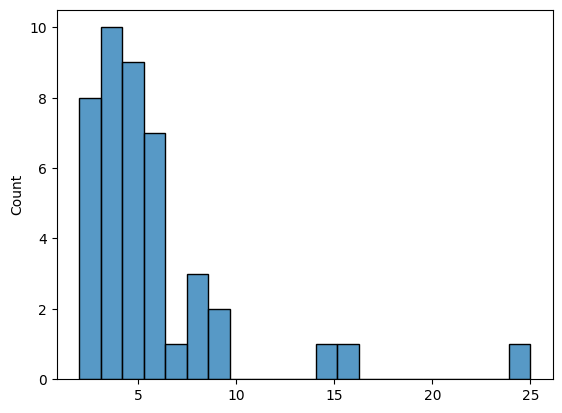

In [7]:
sns.histplot(feat_categorical_nunique);

💡 As a starter, what about simply **removing** all features that have **7 unique values or more**, and one-hot-encode every other? Let's keep ordinal encoding and statistical feature selection for the next iteration of our pipeline.

❓ Store features names to OHE in a list `feat_categorical_small` below. How many features will be OHE?

In [8]:
#Sorting the values
feat_categorical_nunique.sort_values(inplace=True)

In [9]:
# removing cats
cats_reduced = feat_categorical_nunique.drop(labels=["Functional",
                                                    "RoofMatl",
                                                    "HouseStyle",
                                                    "Condition2",
                                                    "Condition1",
                                                    "SaleType",
                                                    "Exterior1st",
                                                    "Exterior2nd",
                                                    "Neighborhood"])

In [10]:
feat_categorical_small = [cat for cat in cats_reduced.index]

🧪 Test your code below (and clear the cell once it passed)

In [11]:
from nbresult import ChallengeResult
result = ChallengeResult('features_overview',
    n=len(feat_categorical_small))
result.write(); print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/andretomaz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/andretomaz/code/Artz90/data-houses-kaggle-competition/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_features_overview.py::TestFeaturesOverview::test_feat_categorical_small PASSED [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/features_overview.pickle

git commit -m 'Completed features_overview step'

git push origin master



### 1.2 Baseline pipe

#### a) Preprocessing

❓ Let's code the basic preprocessing pipeline described below. Save it under `preproc_baseline`.

For categorical features
- Simple-Impute with most frequent values
- One-Hot-Encode features that have less than 7 unique values to start with
- Drop all others features


As for numerical features
- Simple-Impute with strategy 'mean'
- Min-Max Scale 


<details>
    <summary>ℹ️ Click here for a pro tip</summary>

If you are confident, you can try sklearn's shorter syntax `make_pipeline` or `make_column_transformer` instead of the longer syntax `Pipeline` or `ColumnTransformer` if you want to avoid giving names manually to every steps.
</details>

In [12]:
#imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_union
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [13]:
#pre proc numerical features
num_preproc = make_pipeline(SimpleImputer(),MinMaxScaler())

#pre proc categorical features
cat_preproc = make_pipeline(SimpleImputer(strategy = "most_frequent"), OneHotEncoder(handle_unknown='ignore'))

# column transformer
preproc_baseline= make_column_transformer((num_preproc,make_column_selector(dtype_include=['int64','float64'])),
                                           (cat_preproc,feat_categorical_small))

In [14]:
#creating data frame with processed features
pre_proc_df = pd.DataFrame(preproc_baseline.fit_transform(X,y),columns = preproc_baseline.get_feature_names_out())

❓ Look at the **shape** of your preprocessed dataframe and save it to `shape_preproc_baseline` variable

In [15]:
#Storing the shape
shape_preproc_baseline =pre_proc_df.shape

🧪 Test your code below

In [16]:
from nbresult import ChallengeResult
result = ChallengeResult('preproc_baseline',
    shape=shape_preproc_baseline)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/andretomaz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/andretomaz/code/Artz90/data-houses-kaggle-competition/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_preproc_baseline.py::TestPreprocBaseline::test_shape PASSED         [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/preproc_baseline.pickle

git commit -m 'Completed preproc_baseline step'

git push origin master



#### b) Add estimator

❓ Add a simple Decision Tree model to your `preproc_baseline` and store it to `pipe_baseline` variable.

In [17]:
#Instatiating the model
dec_tree = DecisionTreeRegressor()

#making the union to the pipeline
pipe_baseline = make_pipeline(preproc_baseline, dec_tree)

In [18]:
pipe_baseline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x28a056920>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder'...
                                                   'PavedDrive', 'GarageFinish',
                                                   'BsmtQual', 'ExterQual',
                                                   'MasVnrType', 'KitchenQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'Fence', 'MiscFeature',
                                                   'LandContour', 'LotShape',
                                                   'FireplaceQu', 'Electrical',
                                                   'HeatingQC', 'GarageQual',
                                                   'GarageCond', 'MSZoning',
                                                   'LotConfig', 'BldgType',
                                                   'ExterCond', 'BsmtFinType1',
                                                   'RoofStyle', 'GarageType', ...])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

#### c) Cross-Validate

❓ Read the Kaggle [contest evaluation rules](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation) 
- Which performance metric do you need? Is it readily available in sklearn?
- We will need to create our custom `sklearn.metrics.scorer` object so as to pass to any cross-validation or grid search as below


👉 Create a scorer called `rmsle` using [`make_scorer`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) that can be passed as a value for the `scoring` kwarg as below:
```python
cross_val_score(pipe_baseline, X, y, cv=5, scoring=rmsle)
```
👉 Create also the negative version `rmsle_neg` which is best when _maximized_. This will come handy later as `GridSearchCV` always tries to _maximize_ a score
```python
GridSearchCV(pipe_baseline, param_grid=..., cv=5, scoring=rmsle_neg)
```

$$\text{RMSLE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (\log_e (1 + y_i) - \log_e (1 + \hat{y}_i) )^2.}$$

In [19]:
#creating rmsle function
def make_rmsle(y, y_pred):
    log_error = (np.log(1+y)) - (np.log(1+y_pred))
    mean_log_error_squared = ((log_error)**2).mean()
    return np.sqrt(mean_log_error_squared)

rmsle = make_scorer(make_rmsle)

In [56]:
rmsle_neg = make_scorer(lambda y, y_pred: -1 * make_rmsle(y, y_pred))

❓5-fold cross-validate your `pipe_baseline` using this metric to get a first glance at your baseline performance.    

Store your mean score as `score_baseline`

In [21]:
#cross_validation
cv_score= cross_val_score(pipe_baseline,X,y,scoring=rmsle,cv=5)

In [22]:
score_baseline = cv_score.mean()

In [23]:
score_baseline

0.21293530183901543

#### d) Predict baseline

❓ Predict `y_pred_baseline` from the Kaggle `test.csv` dataset you stored in the `data` folder.

In [24]:
#Importing data
test_data= pd.read_csv("data/test.csv")

In [25]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [26]:
#fit data
pipe_baseline.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x28a056920>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder'...
                                                   'PavedDrive', 'GarageFinish',
                                                   'BsmtQual', 'ExterQual',
                                                   'MasVnrType', 'KitchenQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'Fence', 'MiscFeature',
                                                   'LandContour', 'LotShape',
                                                   'FireplaceQu', 'Electrical',
                                                   'HeatingQC', 'GarageQual',
                                                   'GarageCond', 'MSZoning',
                                                   'LotConfig', 'BldgType',
                                                   'ExterCond', 'BsmtFinType1',
                                                   'RoofStyle', 'GarageType', ...])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [27]:
#predict data
y_pred_baseline = pipe_baseline.predict(test_data)

❓ Finally, store your CSV ready to be submitted as `submission_baseline.csv` in the `data` folder. **Carefully read** the Kaggle required format and test it below (you don't need to submit this baseline online for now).

In [28]:
submission_baseline = pd.DataFrame(y_pred_baseline,test_data["Id"]).reset_index()

In [29]:
submission_baseline

,Id,0
0,1461,129000.0
1,1462,155000.0
2,1463,192000.0
3,1464,175000.0
4,1465,212000.0
...,...,...
1454,2915,82500.0
1455,2916,83500.0
1456,2917,142500.0
1457,2918,93500.0


In [30]:
submission_baseline = submission_baseline.rename(columns={"Id": "Id", 0: "SalePrice"})

In [31]:
submission_baseline.to_csv("data/submission_baseline.csv",index=False)

🧪 Test your code

In [32]:
from nbresult import ChallengeResult
tmp = pd.read_csv("data/submission_baseline.csv")
result = ChallengeResult('submission_baseline',
    score_baseline = score_baseline,
    submission_shape = tmp.shape,
    submission_columns = list(tmp.columns),
    submission_dtypes = str(list(tmp.dtypes)),
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/andretomaz/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/andretomaz/code/Artz90/data-houses-kaggle-competition/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_submission_baseline.py::TestSubmissionBaseline::test_score_baseline PASSED [ 25%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_columns PASSED [ 50%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_dtypes PASSED [ 75%]
test_submission_baseline.py::TestSubmissionBaseline::test_submission_shape PASSED [100%]

============================== 4 passed in 0.05s ===============================


💯 You can commit your code:

git add tests/submission_baseline.pickle

git commit -m 'Completed submission_baseline step'

git push origin master



## 🏋️‍♀️ 2. ITERATIONS 

🎉 🎉 Congratulation for having fully pipelined a baseline model! You will see now how much easier it is to iterate and improve performance 🚀

- Your goal is to improve your prediction and submit it online **at least 30 minutes before the Recap ⏳**
- We have some suggestions for improvements below: **Pick your battles** and **incrementally** improve your pipeline as you see fit

**Estimators**

- **Tree-based ensembles (must try today)**: Probably the best suited for problems with many categorical features
- Stacking !
- XGBoost !

**Preprocessing** (once your first ensemble model works)

- Ordinal Encoding of categorical features with a hidden notion of order in their values (e.g. "bad", "average", good")
- Statistical Feature Selection to remove useless features (avoid overfitting and reduce train time)
- Predict `log(SalePrice)` instead?
- ...

### 2.1 Preprocessing Iteration ♲ 
(**⚠️ come back here only after you have iterated on your estimators on section 2.2)**

⏩ Collapse me if you don't use me!

#### a) Ordinal Encoding (1h)

❓ Look at the following feature below. Couldn't it be encoded numerically in a wise manner?
```
ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
```

💡 Luckily, the `OrdinalEncoder` and its argument `categories`  allows us to do just that. Check it out below and make sure to understand how this works

In [33]:
# Define specific order for features
# Note: if you change this order, it will change the output for .transform()
feature_A_sorted_values = ['bad', 'average', 'good'] 
feature_B_sorted_values = ['dirty', 'clean', 'new']

encoder = OrdinalEncoder(
    categories=[
        feature_A_sorted_values,
        feature_B_sorted_values
    ],
    handle_unknown="use_encoded_value",
    unknown_value=-1
)

# Just some random training data
XX = [
    ['good', 'dirty'],
    ['bad', 'new'],
    ['average', 'clean'],
]

encoder.fit(XX)

encoder.transform([
        ['bad', "dirty"],
        ["average", "clean"],
        ['good', 'new'],
        ['bad', 'oooops never seen this label before']
])

NameError: name 'OrdinalEncoder' is not defined

---
❓ **Your turn**: split your categorical preprocessor into

- `preproc_ordinal` to ordinally encode **some features** of your choice
- `preproc_nominal` to one-hot encode the other ones


<details>
    <summary>Hints</summary>

- You won't be able to avoid hard-coding names and ordered values of features! Be tidy!
- It's a good practice to sort alphabetically your features to avoid bad surprises
</details>

In [ ]:
# YOUR CODE HERE

#### b) Statistical Feature Selection (~30min)

Our goal is to remove the least interesting features, to limit overfitting and shorten training time.  

🔥 We will make use of sklearn's [feature selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) transformers directly in your pipeline!

❗️ We recommend you to **try only Option 1 today to start with**. Option 2 and 3 will be corrected in Recap

##### (Option 1 - recommended) <font color=green>Univariate</font> feature selection based on their mutual information with target `y`

- Feel free to add a `SelectPercentile` filter at the end of your `preproc` pipeline.
- This will filter-out features that, - taken individually - least explain your target!
- The statistical test we recommend to pass to SelectPercentile is the `mutual_info_regression`

<details>
    <summary markdown='span'>🤔 What is mutual information? Click here!</summary>

- Mutual information is a *statistical* distance between two probability distributions.
- Correlation is a *linear* distance between two random variables.
- Mutual information is more general and measures the reduction of uncertainty in Y after observing X.
- On the other hand, if you already know you are working with variables that are smooth (like continuous numerical variables), sometimes correlation may tell you more about them, for instance if their relationship is monotonic.

See [animation](https://twitter.com/ari_seff/status/1409296508634152964)
</details>

In [ ]:
# YOUR CODE HERE

##### (option 2) <font color=green>Multivariate</font> feature selection based their combined relationship with target `y`

🤔 We want to remove features that, when in combination with all the others, do not really help predict our target.

1️⃣ To do so, remember that we can use feature [`permutation_importance`](https://scikit-learn.org/stable/modules/permutation_importance.html) metric in combination with an estimator! It trains one pipe per feature, so as to estimate which feature makes our performance score *decrease* the most when shuffling it randomly. These would be our most important features, which we don't want to remove. 

The best thing is, scikit-learn allows you to integrate this methodology directly into your `preproc` pipeline thanks to the [`SequentialFeatureSelector`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html) transformer: this will recursively remove least important features according to the `cross_val_score`.

However, this process can take extremely long to train when you have many features.

2️⃣ Alternatively, a faster way would be to make use of models that already output some measure of feature_importance when fitting them. For instance, Trees with gini-based `feature_importance_`, or Lasso regressions with L1 `coef_`. Again here, scikit-learn already has the [`SelectFromModel`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) transformer to do just that.

In [ ]:
# YOUR CODE HERE

##### (option 3) <font color=green>Unsupervised</font> selection: Filter based only on the properties of `X`? 

❓ A quick win is to remove features with the lowest variance. Think about it: a feature which only has one value is useless (and has a variance of 0).  
- Feel free to add a [`VarianceThreshold`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html) to the end of your pipeline

In [ ]:
# YOUR CODE HERE

❓ Additionally, we can check for correlation between our **numerical features** only

- Use [Pearson's correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) combined with a heatmap to check visually whether some **numerical** features almost entirely correlate with others. 
- Use `VIF` from statsmodels to check for features that have the highest multicollinearity

In [ ]:
# YOUR CODE HERE

❓ For **ordinal features**, we can use [Spearman's rank correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) instead to check whether some **ordinally encoded** features are almost entirely "ordered" similarly to others. Feel free to plot a heatmap again

In [ ]:
# YOUR CODE HERE

❓ Now, feel free to create a "filter" in your pipeline that removes any feature you want beyond a given (Spearman + Pearson) correlation threshold. You'll need a custom transformer class

In [ ]:
# YOUR CODE HERE

#### d) Treat Cyclical features

❓ We have some time-based features, why not **transform them** to cyclical features?

In [ ]:
# YOUR CODE HERE

#### e) Target engineering (15 min)

❓ We are asked to minimize the RMS**L**E. Why don't we transform our target to directly predict its `log`?
- Check out the histogram of the target `y`.
- Normally distributed variables should be easier to predict with linear or parametric models. 
- Create `y_log` and your new performance metrics
- Don't forget to take the exponent of your predictions at the end!

In [ ]:
# YOUR CODE HERE

### 2.2 Model Iteration ♻

#### a ) Final version of the preproc pipeline
❓ We advise you to start with a fresh definition below so you can quickly update it as need be and then try many model types to find the best one possible (you can try grid search or go model by model).

In [34]:
#importing models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [35]:
#Instatiating the models
models = [Ridge(), 
          Lasso(), 
          GradientBoostingRegressor(), 
          KNeighborsRegressor(), 
          SVC(),
          DecisionTreeRegressor()]

# creating pipelines
pipe1= make_pipeline(preproc_baseline,models[0])
pipe2= make_pipeline(preproc_baseline,models[1])
pipe3= make_pipeline(preproc_baseline,models[2])
pipe4= make_pipeline(preproc_baseline,models[3])
pipe5= make_pipeline(preproc_baseline,models[4])
pipe6= make_pipeline(preproc_baseline,models[5])

In [51]:
# creating params for grid search
params1={}
params1['ridge__alpha']=[0.01, 0.1, 1]

params2={}
params2['lasso__alpha'] = [0.01, 0.1, 1]

params3={}
params3['gradientboostingregressor__learning_rate'] =  [0.01,0.02,0.03,0.04]
params3['gradientboostingregressor__subsample'] = [0.9, 0.5, 0.2, 0.1]
params3['gradientboostingregressor__n_estimators'] = [50,80,100]
params3['gradientboostingregressor__max_depth'] = [4,6,8,10]

params4={}
params4['kneighborsregressor__n_neighbors'] = [1,5,8,10,15,20,25]

params5={}
params5['svc__kernel'] = ["linear"]
params5['svc__C']=[1,10,20,50,80,100]

params6={}
params6['decisiontreeregressor__min_samples_leaf'] = [1,2,3,4,5,6,7,8,9,10]
params6['decisiontreeregressor__min_samples_split'] = [1,2,3,4,5,6,7,8,9,10]


In [60]:
#grid searches
ridge_grid= GridSearchCV(pipe1, params1, cv=5, n_jobs=-1, scoring=rmsle_neg).fit(X,y)
lasso_grid = GridSearchCV(pipe2, params2, cv=5, n_jobs=-1, scoring=rmsle_neg).fit(X,y)
gradient_grid = GridSearchCV(pipe3, params3, cv=5, n_jobs=-1, scoring=rmsle_neg).fit(X,y)
knn_grid = GridSearchCV(pipe4, params4, cv=5, n_jobs=-1, scoring=rmsle_neg).fit(X,y)
svc_grid = GridSearchCV(pipe5, params5, cv=5, n_jobs=-1, scoring=rmsle_neg).fit(X,y)
trtee_grid = GridSearchCV(pipe6, params6, cv=5, n_jobs=-1, scoring=rmsle_neg).fit(X,y)

/Users/andretomaz/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.454e+11, tolerance: 6.990e+08
  model = cd_fast.enet_coordinate_descent(
/Users/andretomaz/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.656e+10, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/Users/andretomaz/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

In [61]:
ridge_grid.best_params_, ridge_grid.best_score_

({'ridge__alpha': 1}, -0.16642907520861655)

In [62]:
lasso_grid.best_params_, lasso_grid.best_score_

({'lasso__alpha': 1}, -0.1874321134196891)

In [63]:
gradient_grid.best_params_, gradient_grid.best_score_

({'gradientboostingregressor__learning_rate': 0.04,
  'gradientboostingregressor__max_depth': 8,
  'gradientboostingregressor__n_estimators': 100,
  'gradientboostingregressor__subsample': 0.5},
 -0.13514855856145097)

In [64]:
knn_grid.best_params_, knn_grid.best_score_

({'kneighborsregressor__n_neighbors': 15}, -0.2115540500220318)

In [65]:
svc_grid.best_params_, svc_grid.best_score_

({'svc__C': 1, 'svc__kernel': 'linear'}, -0.25221868037084316)

In [66]:
trtee_grid.best_params_, trtee_grid.best_score_

({'decisiontreeregressor__min_samples_leaf': 9,
  'decisiontreeregressor__min_samples_split': 4},
 -0.18303868471415732)

In [75]:
adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(min_samples_split=4,min_samples_leaf =9),
    n_estimators=100)

pipe7 = make_pipeline(preproc_baseline,adaboost)

In [76]:
cv_results_ada = cross_val_score(pipe7, X, y, scoring =rmsle, cv=5)

In [77]:
cv_results_ada.mean()

0.14455851707151476

In [78]:
opt_model = GradientBoostingRegressor(learning_rate = 0.04,max_depth=8,n_estimators=100, subsample =0.5)
opt_pipe = make_pipeline(preproc_baseline,opt_model)

In [80]:
opt_pipe.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x28a056920>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder'...
                                                   'MasVnrType', 'KitchenQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'Fence', 'MiscFeature',
                                                   'LandContour', 'LotShape',
                                                   'FireplaceQu', 'Electrical',
                                                   'HeatingQC', 'GarageQual',
                                                   'GarageCond', 'MSZoning',
                                                   'LotConfig', 'BldgType',
                                                   'ExterCond', 'BsmtFinType1',
                                                   'RoofStyle', 'GarageType', ...])])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(learning_rate=0.04, max_depth=8,
                                           subsample=0.5))])

In [81]:
y_pred_opt =opt_pipe.predict(test_data)

In [82]:
submission_opt_pipe = pd.DataFrame(y_pred_opt,test_data["Id"]).reset_index()

In [84]:
submission_opt_pipe = submission_opt_pipe.rename(columns={"Id": "Id", 0: "SalePrice"})

In [85]:
submission_opt_pipe.to_csv("data/submission_opt.csv",index=False)

# 🏅FINAL SUBMISSION (submit at least 30 min before Recap)

Discover your real test score by submitting on Kaggle! 

👉 Write down your test score on the [result spreadsheet here](https://docs.google.com/spreadsheets/d/1ZEBKwa_k1Ytb0WCOh-Nopq3eaezwBNu1SAqKXEXRguc/edit#gid=0) (pick the correct batch!)

In [87]:
real_test_score = 13672